In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Import the local utils.py file
import sys
sys.path.append(os.path.join(os.getcwd(), '../'))
from utils import load_config
from preprocessing.preprocessing_utils import build_df
from analysis_utils import dark_viridis

In [2]:
config = load_config()
df = build_df()

In [3]:
# Filter out columns that contain the following strings
remove_columns_with_this_strings = ['TjMAX ']
df = df.drop(columns=df.columns[df.columns.str.contains('|'.join(remove_columns_with_this_strings))])

In [4]:
temperature_columns = [col for col in df.columns if '[°C]' in col]
rpm_columns = [col for col in df.columns if '[RPM]' in col]

temperature_columns, rpm_columns

(['Core Temperatures (avg) [°C]',
  'Core 0 [°C]',
  'Core 1 [°C]',
  'Core 2 [°C]',
  'Core 3 [°C]',
  'CPU Package [°C]',
  'Core Max [°C]',
  'CPU Package [°C].1',
  'CPU IA Cores [°C]',
  'CPU GT Cores (Graphics) [°C]',
  'System [°C]',
  'CPU (PECI) [°C]',
  'PCH Temperature [°C]',
  'Drive Temperature [°C]',
  'Drive Airflow Temperature [°C]',
  'Drive Airflow Temperature [°C].1',
  'Drive Temperature [°C].1',
  'Liquid Temperature [°C]',
  'GPU Temperature [°C]',
  'GPU Hot Spot Temperature [°C]'],
 ['SYS Fan Front [RPM]',
  'SYS Fan Bottom [RPM]',
  'SYS Fan Rear [RPM]',
  'CPU Fan Top [RPM]',
  'CPU Pump [RPM]',
  'GPU Fan [RPM]'])

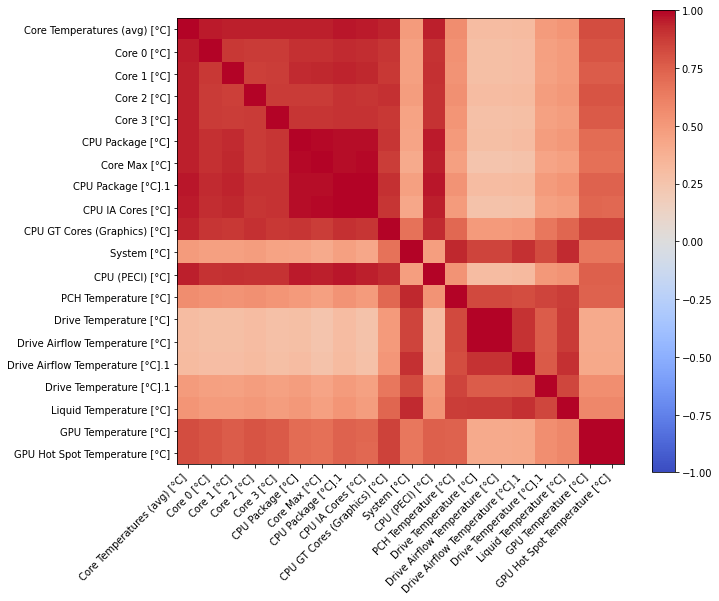

In [5]:
# Find out the correlation of the temperatures
temperature_correlation_matrix = df[temperature_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(temperature_correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
# Make the colorbar as high as the figure
plt.colorbar(shrink=0.85)
plt.yticks(range(len(temperature_columns)), temperature_columns)
# Rotate the x-axis labels
plt.xticks(range(len(temperature_columns)), temperature_columns, rotation=45, ha='right')
plt.show()

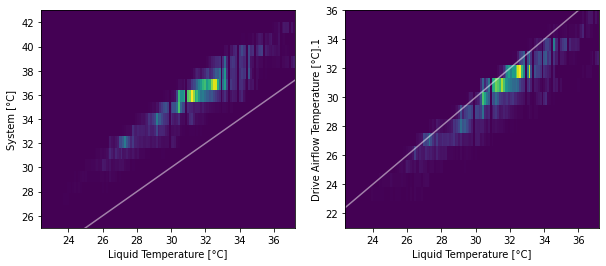

In [6]:
# 2d histograms of
# 1) the liquid temperature and system temperature
# 2) the liquid temperature and drive airflow temperature
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, xk, yk in zip(axes, ['Liquid Temperature [°C]']*2, ['System [°C]', 'Drive Airflow Temperature [°C].1']):
    # Bins with maximum sensible resolution
    max_res_bins = (len(np.unique(df[xk])), len(np.unique(df[yk])))
    ax.hist2d(df[xk], df[yk], bins=max_res_bins)
    # Plot an identity line
    all_min = min(df[xk].min(), df[yk].min())
    all_max = max(df[xk].max(), df[yk].max())
    ax.plot(*([np.arange(all_min, all_max)]*2), color='white', alpha=0.5)
    ax.set_xlabel(xk)
    ax.set_ylabel(yk)

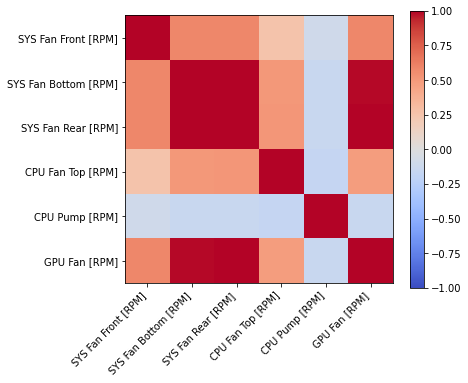

In [7]:
# Find out the correlation of the RPMs
rpm_correlation_matrix = df[rpm_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 6))
plt.imshow(rpm_correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
# Make the colorbar as high as the figure
plt.colorbar(shrink=0.85)
plt.yticks(range(len(rpm_columns)), rpm_columns)
# Rotate the x-axis labels
plt.xticks(range(len(rpm_columns)), rpm_columns, rotation=45, ha='right')
plt.show()

In [8]:
# Find out the correlations of the temperatures with the RPMs
all_correlation_matrix = pd.concat([df[temperature_columns], df[rpm_columns]], axis=1).corr()

# Only keep the correlations of the RPMs with the temperatures
correlation_matrix = all_correlation_matrix.loc[temperature_columns, rpm_columns]

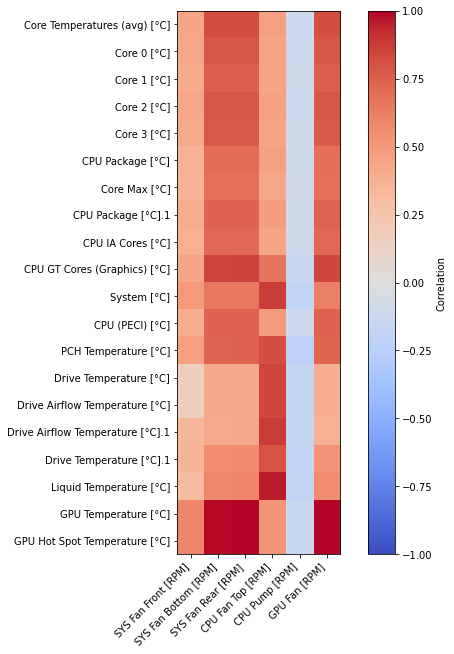

In [9]:
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.yticks(range(len(temperature_columns)), temperature_columns)
# Rotate the x-axis labels
plt.xticks(range(len(rpm_columns)), rpm_columns, rotation=45, ha='right')
plt.show()